# Plotting Sigmoid Neuron Funtion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error
# from tqdm import tqdm_notebook
import seaborn as sb
sb.set()

$S_{w,b} = \frac{1}{1 + e^{-(wx + b)}}$

In [2]:
def sigmoid(x,w,b):
    return 1/(1+np.exp(-(w*x+b)))
    

In [3]:
sigmoid(1,0.5,0)

0.6224593312018546

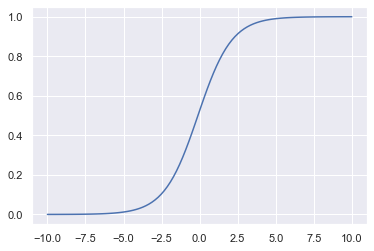

In [4]:
w = 0.9
b = 0.1
X = np.linspace(10,-10,100)
Y = sigmoid(X,w,b)

plt.plot(X,Y)
plt.show()

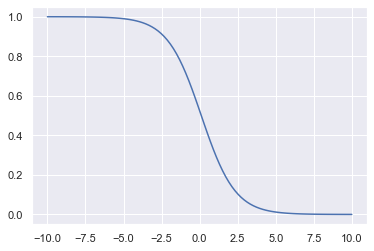

In [5]:
w = -0.9
b = 0.1
X = np.linspace(10,-10,100)
Y = sigmoid(X,w,b)

plt.plot(X,Y)
plt.show()

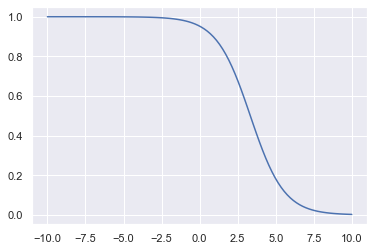

In [6]:
w = -0.9            #@param {type: "slider",min:-2,max: 2} useing them in Google Colab
b = 3
X = np.linspace(10,-10,100)
Y = sigmoid(X,w,b)

plt.plot(X,Y)
plt.show()

$S(w_1,w_2,b)(x_1,x_2) = \frac{1}{1+e^{-(w_1x_1+w_2x_2 + b)}}$

In [7]:
def sigmoid_2d(x1,x2,w1,w2,b):
    return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

sigmoid_2d(1,0,0.5,0,0)

0.6224593312018546

In [8]:
from mpl_toolkits import mplot3d

(100,)


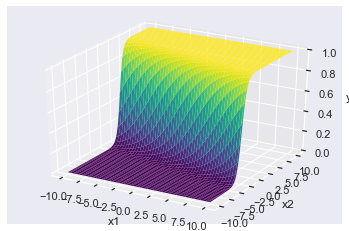

In [9]:

X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)

XX1,XX2 =np.meshgrid(X1,X2)
print(X1.shape)
w1=0.5
w2 = 2
b = 0
Y = sigmoid_2d(XX1,XX2,w1,w2,b)

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(XX1, XX2, Y,cmap='viridis', edgecolor='none');
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

In [10]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

(100,)


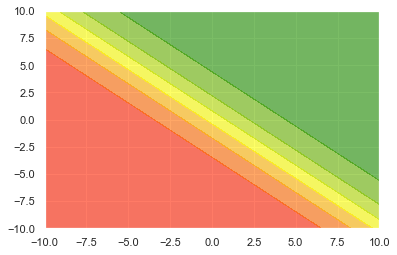

In [11]:
XX1,XX2 =np.meshgrid(X1,X2)
print(X1.shape)
w1=0.5
w2 =0.5
b = 0
Y = sigmoid_2d(XX1,XX2,w1,w2,b)
plt.contourf(XX1,XX2,Y,cmap=my_cmap,alpha = 0.6)
plt.show()

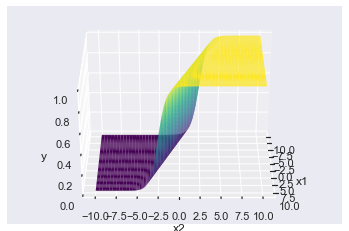

In [12]:
ax.view_init(30,0)
fig

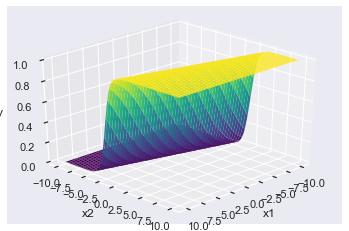

In [13]:
ax.view_init(30,45)
fig

# Compute Loss for given data set

In [14]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 -10
Y = sigmoid(X, w_unknown,b_unknown)

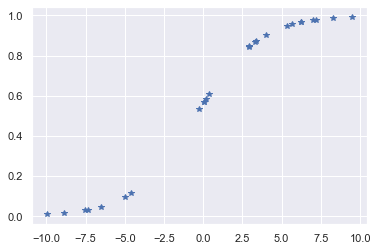

In [15]:
plt.plot(X,Y,'*')
plt.show()

In [16]:
def calculate_loss(X, Y, w_est, b_est):
    loss = 0
    for x, y in zip(X, Y):
        loss += (y - sigmoid(x, w_est, b_est))**2
    return loss

In [17]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [18]:
WW.shape

(101, 101)

In [19]:
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        Loss[i, j] = calculate_loss(X, Y, WW[i,j],BB[i,j]) 

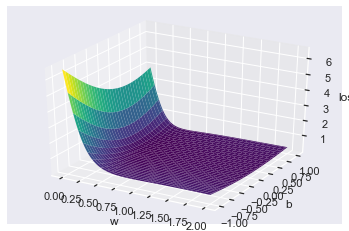

In [20]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(WW, BB, Loss,cmap='viridis', edgecolor='none');
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss');

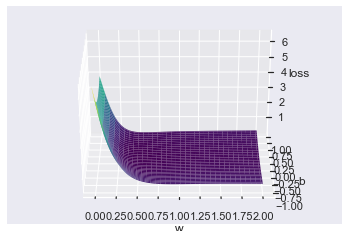

In [21]:
ax.view_init(30,270)
fig

In [22]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])
print(i, j)

63 25


In [23]:
print(WW[i, j], BB[i, j])

0.5 0.26


# Class for Sigmoid Neuron

In [24]:
class SigmoidNeuron:
    
    def __init__(self):
        self.w = None
        self.b = None
    
    def perceptron(self,x):
        return np.dot(x,self.w.T) + self.b
    
    def sigmoid(self, x):
        return 1.0/(1.0 +np.exp(-x))
    
    def grad_w(self, x, y):                                #Computing Gradient
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred -y) * y_pred * (1 - y_pred) * x
    
    def grad_b(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred -y) * y_pred * (1 - y_pred)
    
    def fit(self, X, Y, epochs = 1,learning_rate = 1, initialise = True,display_loss=False):
        
        #initialise w,b
        if initialise:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0
            
        if display_loss:
             loss = {}
            
        
        for i in range(epochs):
            dw = 0
            db = 0
            for x, y in zip(X,Y):
                dw += self.grad_w(x, y)
                db += self.grad_b(x, y)
                
            self.w -= learning_rate * dw
            self.b -= learning_rate * db
            
            if display_loss:
                Y_pred = self.sigmoid(self.perceptron(X))
                loss[i] = mean_squared_error(Y_pred,Y)
                
        if display_loss:
            plt.plot(list(loss.values()))
            plt.show()
                
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)               

    

# Fit for Toy Data

In [25]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])  #linearly seperable data
Y = [1, 1, 1, 0, 0, 0] # ground Truth

In [26]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

In [27]:
def plot_sn(X, Y, sn, ax):
    X1 = np.linspace(-10, 10, 100)
    X2 = np.linspace(-10, 10, 100)
    XX1, XX2 = np.meshgrid(X1, X2)
    YY = np.zeros(XX1.shape)
    for i in range(X2.size):
        for j in range(X1.size):
            val = np.asarray([X1[j], X2[i]])
            YY[i, j] = sn.sigmoid(sn.perceptron(val))
    ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
    ax.scatter(X[:,0], X[:,1],c=Y, cmap=my_cmap)
    ax.plot()

[[ 0.53082871 -0.83408746]] [0.00384463]
[[ 0.80303366 -0.50243212]] [0.03853163]
[[ 1.02691384 -0.18866248]] [-0.01041019]
[[ 1.02251319 -0.46437029]] [-0.07891906]
[[ 1.15953644 -0.29471709]] [-0.12940887]
[[ 1.17041658 -0.45536452]] [-0.18451669]
[[ 1.25657203 -0.37707429]] [-0.22625918]
[[ 1.28397157 -0.4478345 ]] [-0.26827445]
[[ 1.33664503 -0.43281206]] [-0.30344716]
[[ 1.37150695 -0.45762002]] [-0.33698852]
[[ 1.40940316 -0.46488047]] [-0.36728339]
[[ 1.44285633 -0.47702116]] [-0.39552865]
[[ 1.474711   -0.48692151]] [-0.42171923]
[[ 1.50454299 -0.49654636]] [-0.44616034]
[[ 1.53269509 -0.50557334]] [-0.46903125]
[[ 1.55932095 -0.51411792]] [-0.49050132]
[[ 1.58457268 -0.52222192]] [-0.51071377]
[[ 1.60857959 -0.52992722]] [-0.52979261]
[[ 1.63145416 -0.53726988]] [-0.54784553]
[[ 1.65329466 -0.54428143]] [-0.56496652]
[[ 1.67418741 -0.55098954]] [-0.58123795]
[[ 1.69420859 -0.55741865]] [-0.59673236]
[[ 1.71342578 -0.56359041]] [-0.61151389]
[[ 1.73189914 -0.56952412]] [-0.6256

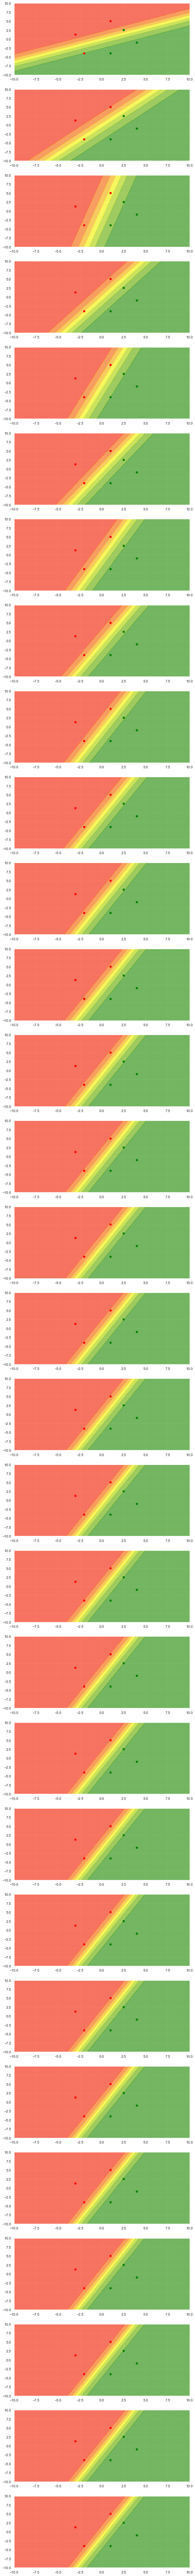

In [28]:
sn.fit(X, Y, 1, 0.05, True)
N = 30
plt.figure(figsize=(10, N*5))
for i in range(N):
    print(sn.w, sn.b)
    ax = plt.subplot(N, 1, i + 1)
    plot_sn(X, Y, sn, ax)
    sn.fit(X, Y, 1, 0.5, False)

# Load Data (Real world example)

link for data-> https://www.dropbox.com/s/739uo8ebwbic9kb/mobile_cleaned.csv<br>
                https://drive.google.com/open?id=1rtwC_k4WA8TuGmV4hhSPDp5S4meIXBNV

In [29]:
data = pd.read_csv('mobile_cleaned.csv')

In [30]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [31]:
data.shape

(341, 88)

In [32]:
X = data.drop('Rating', axis=1) #Dataframe
Y = data['Rating'].values       #array
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [33]:
threshold = 4
data['Class'] = (data['Rating'] >= threshold).astype(np.int)


In [34]:
data['Class'].value_counts(normalize=True)

1    0.697947
0    0.302053
Name: Class, dtype: float64

In [35]:
data['Class']

0      1
1      1
2      1
3      1
4      1
      ..
336    0
337    0
338    1
339    0
340    1
Name: Class, Length: 341, dtype: int32

In [36]:
Y_binarized = data['Class'].values

In [37]:
Y_binarized

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,

# Standardizing Data

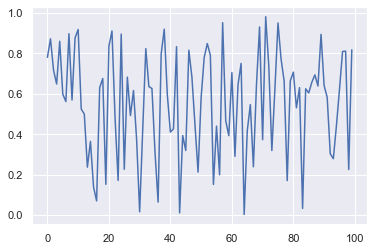

In [38]:
R = np.random.random([100,1])
plt.plot(R)
plt.show()

In [39]:
np.std(R)

0.2569053380641297

In [40]:
np.mean(R)

0.5557861758541623

In [41]:
scaler = StandardScaler()
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
scaler.mean_

array([0.55578618])

In [43]:
RT = scaler.transform(R)
np.mean(RT)

-2.353672812205332e-16

In [44]:
np.std(RT)

1.0

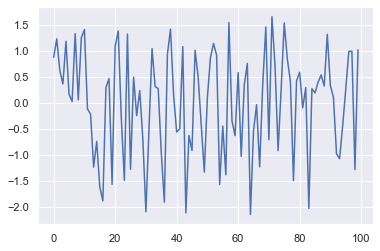

In [45]:
plt.plot(RT)
plt.show()

## Train test split

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, stratify=Y_binarized)

In [48]:
print(X_train.shape,X_test.shape)

(255, 87) (86, 87)


In [49]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [50]:
minmax_scaler = MinMaxScaler()

In [51]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1, 1))
np.min(Y_scaled_train)

0.0

In [52]:
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1, 1))

In [53]:
scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(1, -1)))[0][0]

In [54]:
scaled_threshold

0.5454545454545454

In [55]:
Y_binarised_train = (Y_scaled_train > scaled_threshold).astype("int").ravel()
Y_binarised_test = (Y_scaled_test > scaled_threshold).astype("int").ravel()

In [56]:
Y_binarised_test

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1])

# Train on real data

In [57]:
sn = SigmoidNeuron()

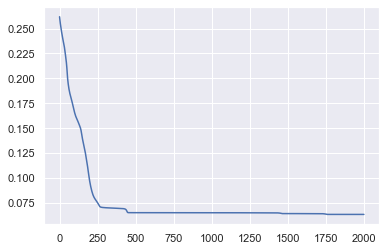

In [58]:
sn.fit(X_scaled_train, Y_scaled_train, epochs=2000, learning_rate=0.015,display_loss = True)

In [59]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [60]:
Y_pred_binarised_train = (Y_pred_train > scaled_threshold).astype("int").ravel()
Y_pred_binarised_test = (Y_pred_test > scaled_threshold).astype("int").ravel()

In [61]:
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_binarised_train)
accuracy_test  = accuracy_score(Y_pred_binarised_test, Y_binarised_test)

In [62]:
print(accuracy_train,accuracy_test)

0.8 0.686046511627907
